# Project Overview

For this project we will be analysing data from the <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset">Diabetes prediction dataset</a>, hosted on Kaggle. The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

The objective of this project is twofold:
- Exploratory Analysis: Investigate the relationships between demographic/medical factors and diabetes prevalence.
- Predictive Modeling: Develop and evaluate machine learning and deep learning models to predict diabetes status based on patient information.

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

**Dataframe info, description and head**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**gender:** Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male, female and other.

**age:** Age is an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0 to 80 in our dataset.

**hypertension:** Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values 0 or 1, where 0 indicates they don’t have hypertension and 1 indicates they have hypertension.

**heart_disease:** Heart disease is a medical condition that is associated with an increased risk of developing diabetes. It has values 0 or 1, where 0 indicates they don’t have heart disease and 1 indicates they have heart disease.

**smoking_history:** Smoking history is considered a risk factor for diabetes. In our dataset we have 6 categories i.e not current, former, No Info, current, never and ever.

**bmi:** BMI (Body Mass Index) is a measure of body fat based on weight and height. The range of BMI in the dataset is from 10.01 to 95.69. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight and 30 or more is obese.

**HbA1c_level:** HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.

**blood_glucose_level:** Blood glucose level refers to the amount of glucose in the bloodstream at a given time.

**diabetes:** Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Cleaning

**Check for NaN values**

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

The dataset does not contain any NaN values.

# Feature Engineering

**Conversion of age to integer**

In [3]:
np.sort(df[df["age"]<=1]["age"].unique())

array([0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 , 0.88,
       1.  ])

As we can see from the above array for ages 0 to 1, age data is provided as a float with 2 decimal places. For clarity, we will round these values to convert them into integers. For example all to ages from 0 to 1, as above, will take the value 1.

In [4]:
df["age"] = np.ceil(df["age"]).astype(int)

**Re-categorization of smoking_history**

In [5]:
df["smoking_history"].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Due to overlapping meanings and sparsity in the original smoking_history categories, we will merge and rephrase them for clarity. The original categories "ever", "not current" and "former" will be combined into a single "past" category. The resulting categories will be:
- "never": patients who have never smoked
- "past": patients who smoked previously but do not currently smoke
- "current": patients who currently smoke
- "unknown": patients with missing or unspecified smoking history

In [6]:
df["smoking_history"] = df["smoking_history"].replace("No Info", "unknown")
df["smoking_history"] = df["smoking_history"].replace(["former", "not current", "ever"], "past")

**Bmi outliers**

In [7]:
df[df["bmi"]>60]["bmi"].count()

np.int64(115)

Generally, BMI above 30 is considered as obese. In this dataset, we identified 115 clinically implausible BMI values (>60). We will cap them at 60.

In [8]:
df["bmi"] = df["bmi"].apply(lambda x: min(x, 60))

# Explanatory Data Analysis (EDA)

**Diabetes**

<Axes: xlabel='diabetes', ylabel='count'>

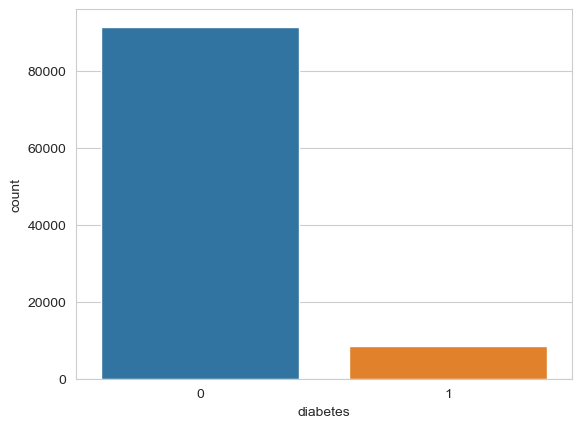

In [14]:
sns.countplot(data=df, x="diabetes", hue="diabetes", legend=False)

In [15]:
df["diabetes"].value_counts(normalize=True) * 100

diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

The calculated percentages indicate that the dataset is imbalanced.

**Gender**

<Axes: xlabel='gender', ylabel='count'>

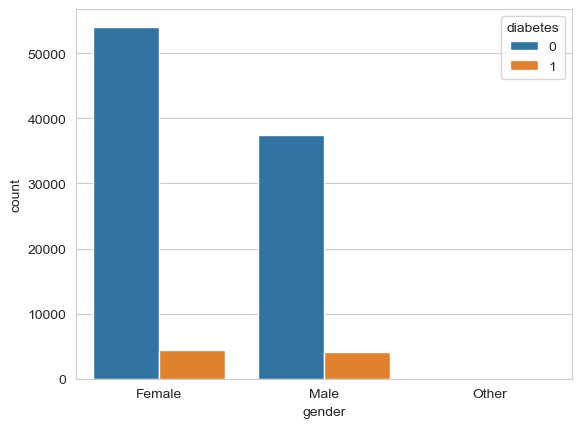

In [16]:
sns.countplot(data=df, x="gender", hue="diabetes")

In [17]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [18]:
print("Percentage of Diabetes positive patients by gender")
print(f'Female: {np.round((df[df["gender"]=="Female"]["diabetes"].sum() / len(df[df["gender"]=="Female"]) * 100), decimals=1)}%')
print(f'Male: {np.round((df[df["gender"]=="Male"]["diabetes"].sum() / len(df[df["gender"]=="Male"]) * 100), decimals=1)}%')

Percentage of Diabetes positive patients by gender
Female: 7.6%
Male: 9.7%


In the dataset female patients are more than male and patients with other gender are only 18. Diabetes prevalence is slightly higher among men in this dataset.

**Smoking history**

<Axes: xlabel='smoking_history', ylabel='count'>

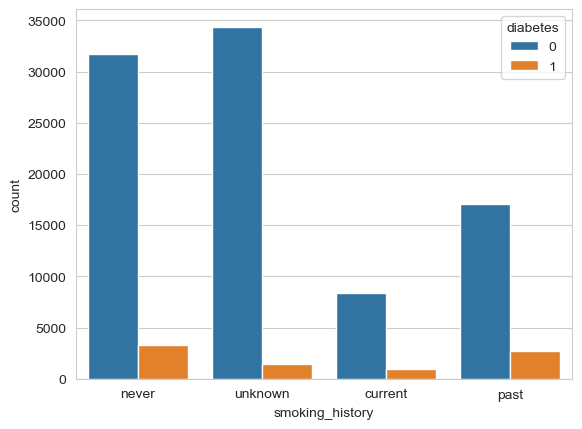

In [19]:
sns.countplot(data=df, x="smoking_history", hue="diabetes")

In [20]:
df["smoking_history"].value_counts()

smoking_history
unknown    35816
never      35095
past       19803
current     9286
Name: count, dtype: int64

In [21]:
print("Percentage of Diabetes positive patients by smoking history")
print(f"Never: {np.round((df[df["smoking_history"]=="never"]["diabetes"].sum() / len(df[df["smoking_history"]=="never"]) * 100), decimals=1)}%")
print(f"Unknown: {np.round((df[df["smoking_history"]=="unknown"]["diabetes"].sum() / len(df[df["smoking_history"]=="unknown"]) * 100), decimals=1)}%")
print(f"Current: {np.round((df[df["smoking_history"]=="current"]["diabetes"].sum() / len(df[df["smoking_history"]=="current"]) * 100), decimals=1)}%")
print(f"Past: {np.round((df[df["smoking_history"]=="past"]["diabetes"].sum() / len(df[df["smoking_history"]=="past"]) * 100), decimals=1)}%")

Percentage of Diabetes positive patients by smoking history
Never: 9.5%
Unknown: 4.1%
Current: 10.2%
Past: 13.9%


Most of the patients have never smoked or have an unknown smoking history. The latter group makes up 1/3 of the dataset, making it difficult to establish relationships between smoking history and diabetes.

**Hypertension**

<Axes: xlabel='hypertension', ylabel='count'>

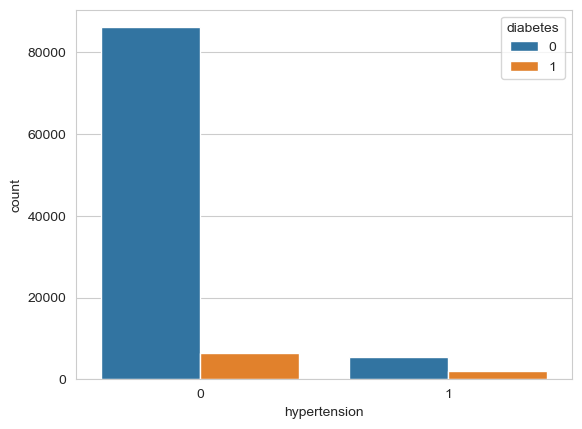

In [22]:
sns.countplot(data=df, x="hypertension", hue="diabetes")

In [23]:
df["hypertension"].value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [24]:
print("Percentage of Diabetes positive patients by hypertension state")
print(f'Hypertension negative: {np.round((df[df["hypertension"]==0]["diabetes"].sum() / len(df[df["hypertension"]==0]) * 100), decimals=1)}%')
print(f'Hypertension positive: {np.round((df[df["hypertension"]==1]["diabetes"].sum() / len(df[df["hypertension"]==1]) * 100), decimals=1)}%')

Percentage of Diabetes positive patients by hypertension state
Hypertension negative: 6.9%
Hypertension positive: 27.9%


Most of the patients in the dataset does not have hypertension. Diabetes prevalence is considerably higher among patients with hypertension.

**Heart disease**

<Axes: xlabel='heart_disease', ylabel='count'>

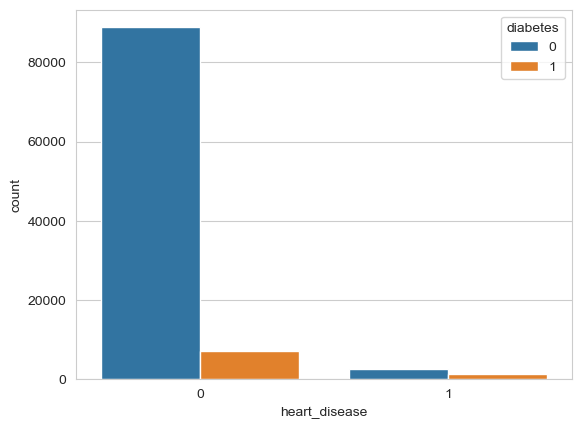

In [25]:
sns.countplot(data=df, x="heart_disease", hue="diabetes")

In [26]:
df["heart_disease"].value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [27]:
print("Percentage of Diabetes positive patients by hypertension state")
print(f'Heart disease negative: {np.round((df[df["heart_disease"]==0]["diabetes"].sum() / len(df[df["heart_disease"]==0]) * 100), decimals=1)}%')
print(f'Heart disease positive: {np.round((df[df["heart_disease"]==1]["diabetes"].sum() / len(df[df["heart_disease"]==1]) * 100), decimals=1)}%')

Percentage of Diabetes positive patients by hypertension state
Heart disease negative: 7.5%
Heart disease positive: 32.1%


Most of the patients in the dataset does not have heart disease. Diabetes prevalence is considerably higher among patients with heart disease.

**Age**

<Axes: xlabel='age', ylabel='Count'>

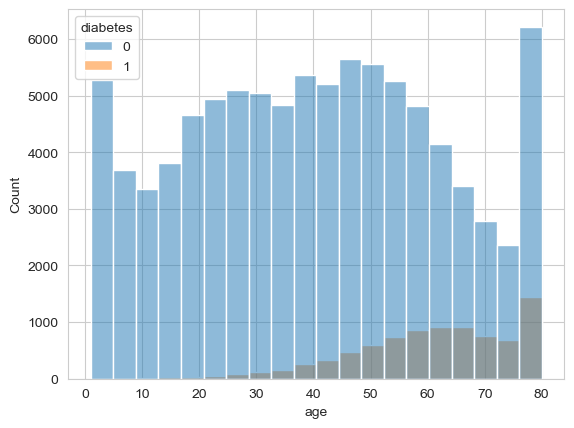

In [28]:
sns.histplot(data=df, x="age", hue="diabetes", bins=20)

<Axes: xlabel='age'>

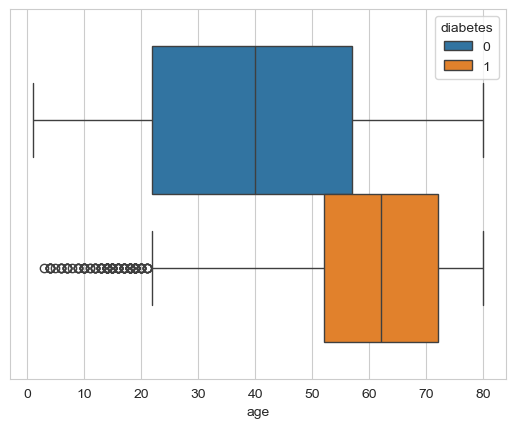

In [29]:
sns.boxplot(data=df, x="age", hue="diabetes")

The age distribution is generally smooth, with the majority of patients falling between 40 and 60 years old. There are noticeable spikes in the very young (0–5 years) and older age groups (75–80 years). Diabetes prevalence appears to increase with age, with most cases occurring around 60 years old.

**BMI**

<Axes: xlabel='bmi', ylabel='Count'>

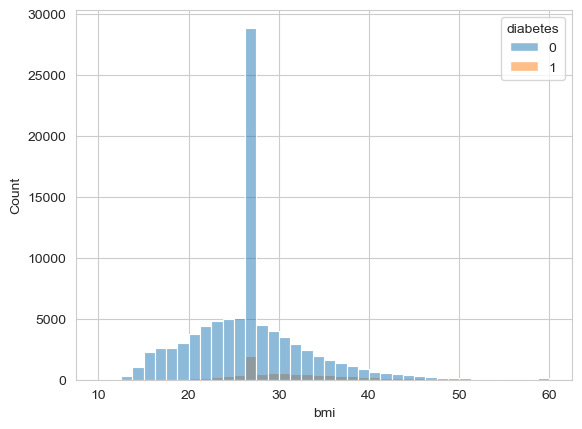

In [30]:
sns.histplot(data=df, x="bmi", hue="diabetes", bins=40)

<Axes: xlabel='bmi'>

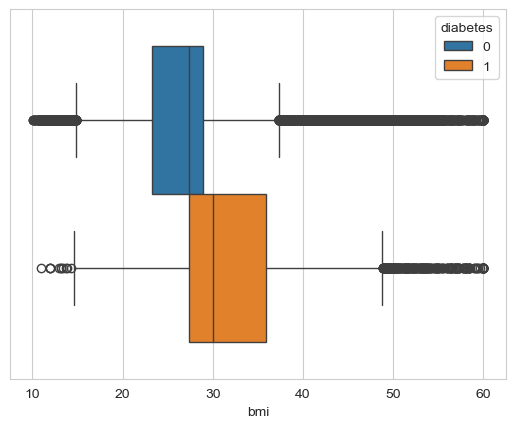

In [31]:
sns.boxplot(data=df, x="bmi", hue="diabetes")

In [32]:
print("Percentage of Diabetes positive patients by BMI categories")
print(f'Underweight: {np.round((df[df["bmi"]<18.5]["diabetes"].sum() / len(df[df["bmi"]<18.5]) * 100), decimals=1)}%')
print(f'Healthy Weight: {np.round((df[(df["bmi"]>=18.5) & (df["bmi"]<25)]["diabetes"].sum() / len(df[(df["bmi"]>=18.5) & (df["bmi"]<25)]) * 100), decimals=1)}%')
print(f'Overweight: {np.round((df[(df["bmi"]>=25) & (df["bmi"]<30)]["diabetes"].sum() / len(df[(df["bmi"]>=25) & (df["bmi"]<30)]) * 100), decimals=1)}%')
print(f'Obesity: {np.round((df[df["bmi"]>=30]["diabetes"].sum() / len(df[df["bmi"]>=30]) * 100), decimals=1)}%')

Percentage of Diabetes positive patients by BMI categories
Underweight: 0.8%
Healthy Weight: 3.9%
Overweight: 7.3%
Obesity: 18.0%


Diabetes prevalence appears to increase with BMI.

**HbA1c level**

<Axes: xlabel='HbA1c_level', ylabel='Count'>

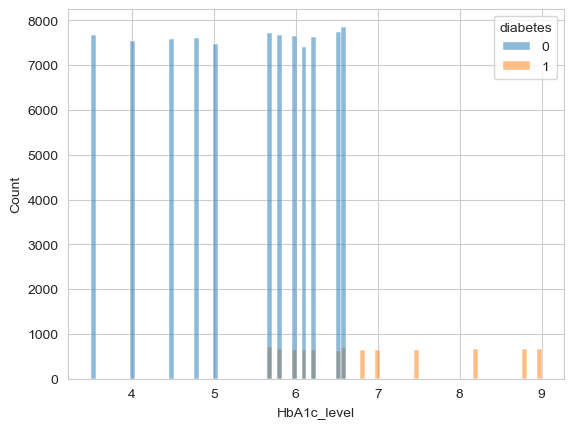

In [33]:
sns.histplot(data=df, x="HbA1c_level", hue="diabetes")

<Axes: xlabel='HbA1c_level'>

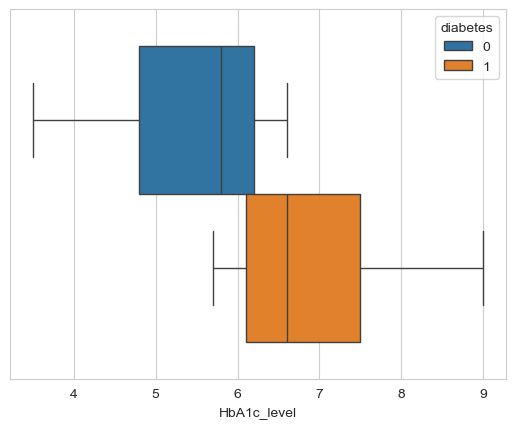

In [34]:
sns.boxplot(data=df, x="HbA1c_level", hue="diabetes")

Diabetes prevalence appears to increase with HbA1c level. The majority of diabetes-positive patients present with HbA1c levels greater than 6, which aligns with clinical diagnostic thresholds for diabetes (>=6.5% is diagnostic for diabetes, 5.7–6.4% is prediabetes).

**Blood glucose level**

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

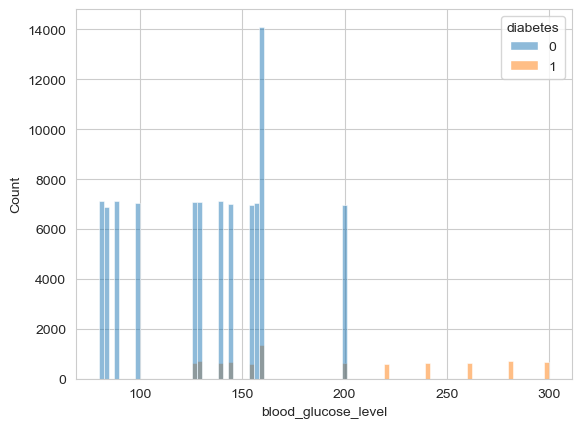

In [35]:
sns.histplot(data=df, x="blood_glucose_level", hue="diabetes")

<Axes: xlabel='blood_glucose_level'>

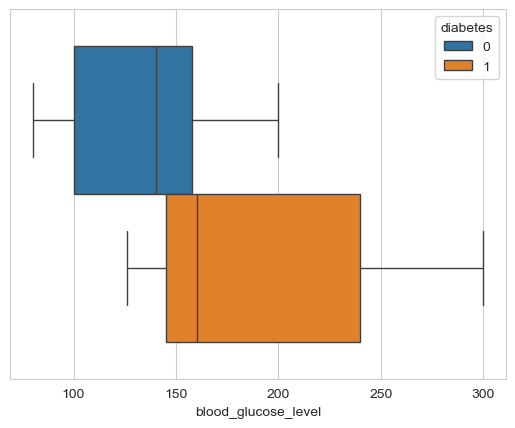

In [36]:
sns.boxplot(data=df, x="blood_glucose_level", hue="diabetes")

Diabetes prevalence appears to increase with blood glucose level.

**Correlations**

<Axes: >

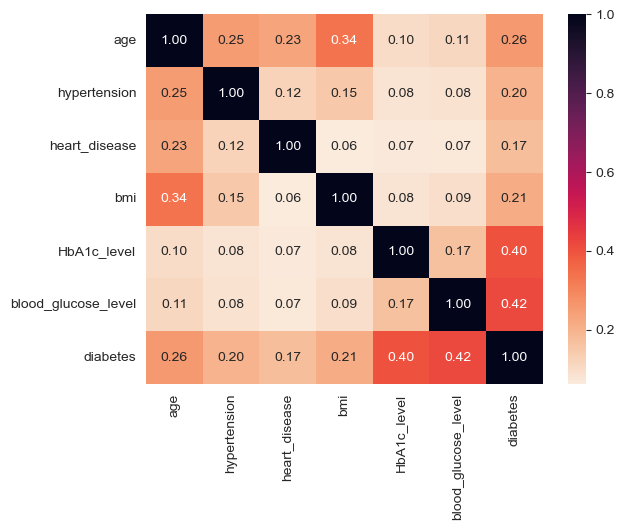

In [37]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(data=df_corr, annot=True, cmap="rocket_r", fmt=".2f")

HbA1c and blood glucose level show the strongest correlation with diabetes status.

**Summary of the observations from the explanatory data analysis:**
- The dataset is imbalanced, with diabetes-negative patients forming the majority class.
- Diabetes prevalence is slightly higher among men.
- The relationship between smoking history and diabetes is not clearly established.
- Diabetes prevalence is considerably higher among patients with hypertension and heart disease.
- Diabetes prevalence increases with age, BMI, HbA1c levels, and blood glucose levels.

# Data Encoding for Model Training

**Gender and smoking history one-hot encoding**

In [9]:
df = pd.get_dummies(data=df, columns=["gender", "smoking_history"], drop_first=True)

# Data Analysis (Machine Learning)

Given the medical context, we prioritized **recall** for diabetes-positive patients to minimize false negatives. **F1-score** and **ROC-AUC** are also reported to provide a complete picture of model performance.

## Data Preprocessing

**Preparation of data to train/test**

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["diabetes"])
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Scale data**

In [11]:
from sklearn.preprocessing import StandardScaler
num_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [13]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Logistic Regression

**Baseline model**

In [41]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state=101)
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
y_proba = model_log.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27475
           1       0.87      0.63      0.73      2525

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000

ROC-AUC: 0.961


**Baseline model + (class_weight="balanced")**

In [42]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state=101, class_weight="balanced")
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
y_proba = model_log.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     27475
           1       0.42      0.88      0.57      2525

    accuracy                           0.89     30000
   macro avg       0.70      0.88      0.75     30000
weighted avg       0.94      0.89      0.90     30000

ROC-AUC: 0.962


**Grid Search CV**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model_log = LogisticRegression(random_state=101, class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']
}
grid_log = GridSearchCV(estimator=model_log, param_grid=param_grid, scoring='recall', cv=5)
grid_log.fit(X_train, y_train)

print("Best parameters:", grid_log.best_params_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


**Baseline model + (class_weight="balanced", C=0.01, penalty="l2")**

In [44]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(random_state=101, class_weight='balanced', C=0.01, penalty="l2")
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
y_proba = model_log.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     27475
           1       0.42      0.88      0.57      2525

    accuracy                           0.89     30000
   macro avg       0.70      0.88      0.75     30000
weighted avg       0.94      0.89      0.90     30000

ROC-AUC: 0.962


Optimal model metrics:
**recall_1 = 0.88 / f1-score_1 = 0.57 / ROC-AUC = 0.962**

## Random Forest

**Baseline model**

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=101)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27475
           1       0.94      0.68      0.79      2525

    accuracy                           0.97     30000
   macro avg       0.96      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC: 0.963


**Baseline model + (class_weight="balanced")**

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=101, class_weight="balanced")
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27475
           1       0.94      0.68      0.79      2525

    accuracy                           0.97     30000
   macro avg       0.95      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC: 0.965


**Grid Search CV**

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier(random_state=101, class_weight="balanced")
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2] 
}
grid_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring="recall", cv=3, verbose=3)
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.706 total time=   2.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.670 total time=   2.2s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.693 total time=   2.3s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.704 total time=   4.7s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.669 total time=   4.4s
[CV 3/3] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.694 total time=   4.5s
[CV 1/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.728 total time=   2.3s
[CV 2/3] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.69

**Baseline model + (class_weight="balanced", max_depth=10, min_samples_leaf=2, min_samples_split=5)**

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=101, class_weight="balanced", 
                                  max_depth=10, min_samples_leaf=2, min_samples_split=5)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_proba = model_rf.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     27475
           1       0.46      0.91      0.61      2525

    accuracy                           0.90     30000
   macro avg       0.73      0.91      0.78     30000
weighted avg       0.95      0.90      0.92     30000

ROC-AUC: 0.976


Optimal model metrics:
**recall_1 = 0.91 / f1-score_1 = 0.61 / ROC-AUC = 0.976**

## Gradient Boosting

**Baseline model**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=101)
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)
y_proba = model_gb.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     27475
           1       0.98      0.67      0.80      2525

    accuracy                           0.97     30000
   macro avg       0.98      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC: 0.979


**Randomized Search CV**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
model_gb = GradientBoostingClassifier(random_state=101)
param_distributions = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4] 
}
grid_gb = RandomizedSearchCV(estimator=model_gb, param_distributions=param_distributions, n_iter=10, scoring="recall", cv=3, verbose=3)
grid_gb.fit(X_train, y_train)

print("Best parameters:", grid_gb.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.718 total time=  14.1s
[CV 2/3] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.682 total time=  13.8s
[CV 3/3] END learning_rate=0.2, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.711 total time=  14.0s
[CV 1/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.708 total time=   9.0s
[CV 2/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.670 total time=   9.2s
[CV 3/3] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.696 total time=   9.1s
[CV 1/3] END learning_rate=0.2, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.719 total 

**Baseline model + (n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_depth=7, learning_rate=0.2)**

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=101, n_estimators=200, 
                                      min_samples_split=5, min_samples_leaf=4, max_depth=7, learning_rate=0.2)
model_gb.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)
y_proba = model_gb.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27475
           1       0.92      0.69      0.79      2525

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.89     30000
weighted avg       0.97      0.97      0.97     30000

ROC-AUC: 0.973


Optimal model metrics:
**recall_1 = 0.69 / f1-score_1 = 0.79 / ROC-AUC = 0.973**

## Models Comparison

<table>
    <tr>
        <th></th>
        <th>Recall (class 1)</th>
        <th>F1-Score (class 1)</th>
        <th>ROC-AUC</tr>
    </tr>
    <tr>
        <td><b>Logistic Regression</b></td>
        <td>0.88</td>
        <td>0.57</td>
        <td>0.962</td>
    </tr>
    <tr style="background-color: #d4edda;">
        <td><b>Random Forest</b></td>
        <td>0.91</td>
        <td>0.61</td>
        <td>0.976</td>
    </tr>
    <tr>
        <td><b>Gradient Boosting</b></td>
        <td>0.69</td>
        <td>0.79</td>
        <td>0.973</td>
    </tr>
</table>

In the medical context, where minimizing false negatives is critical, the Random Forest model is the most effective due to its high recall.

# Data Analysis (Deep Learning)

## Data Preprocessing

Due to the large size of the dataset we will perform data sampling to enable running deep learning computations locally.

**Preparation of data to train/test and sample**

In [53]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["diabetes"])
y = df["diabetes"]
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, stratify=y, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=101)

**Scale data**

In [54]:
from sklearn.preprocessing import StandardScaler
num_features = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

## Sequential (Keras-Tensorflow)

In [56]:
import random
import numpy as np
import tensorflow as tf

seed = 101
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

**Baseline model**

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

model_seq = Sequential()
model_seq.add(Input(shape=(X_train.shape[1],)))
model_seq.add(Dense(32, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer="adam", loss='binary_crossentropy', metrics=[Recall(name="recall"), Precision(name="precision")])
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=30, restore_best_weights=True)

history = model_seq.fit(x=X_train, y=y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_proba = model_seq.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

Epoch 1/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3276 - precision: 0.0600 - recall: 0.0101 - val_loss: 0.1808 - val_precision: 1.0000 - val_recall: 0.0039
Epoch 2/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1704 - precision: 0.8564 - recall: 0.2706 - val_loss: 0.1408 - val_precision: 0.8472 - val_recall: 0.4784
Epoch 3/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1461 - precision: 0.7690 - recall: 0.5261 - val_loss: 0.1323 - val_precision: 0.8494 - val_recall: 0.5529
Epoch 4/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1404 - precision: 0.7727 - recall: 0.5714 - val_loss: 0.1278 - val_precision: 0.8555 - val_recall: 0.5804
Epoch 5/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1333 - precision: 0.7968 - recall: 0.5866 - val_loss: 0.1250 - val_precision: 0.8466 - val_recall: 0.5843
Epoch 6/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1268 - precision: 0.8132 - recall: 0.6000 - val_loss: 0.1239 - val_precision: 0.8896 - val_r

**Baseline model + (neurons 62/32)**

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

model_seq = Sequential()
model_seq.add(Input(shape=(X_train.shape[1],)))
model_seq.add(Dense(64, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(32, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer="adam", loss='binary_crossentropy', metrics=[Recall(name="recall"), Precision(name="precision")])
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=30, restore_best_weights=True)

history = model_seq.fit(x=X_train, y=y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_proba = model_seq.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

Epoch 1/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2464 - precision: 0.6434 - recall: 0.2639 - val_loss: 0.1387 - val_precision: 0.8389 - val_recall: 0.4902
Epoch 2/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1360 - precision: 0.7846 - recall: 0.5815 - val_loss: 0.1280 - val_precision: 0.8278 - val_recall: 0.5843
Epoch 3/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1324 - precision: 0.8048 - recall: 0.6168 - val_loss: 0.1239 - val_precision: 0.8389 - val_recall: 0.5922
Epoch 4/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1265 - precision: 0.8178 - recall: 0.6185 - val_loss: 0.1210 - val_precision: 0.8580 - val_recall: 0.5922
Epoch 5/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1200 - precision: 0.8523 - recall: 0.6303 - val_loss: 0.1198 - val_precision: 0.8663 - val_recall: 0.5843
Epoch 6/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1180 - precision: 0.8635 - recall: 0.6168 - val_loss: 0.1186 - val_precision: 0.8727 - val_r

**Baseline model + (batch_size=64)**

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

model_seq = Sequential()
model_seq.add(Input(shape=(X_train.shape[1],)))
model_seq.add(Dense(32, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer="adam", loss='binary_crossentropy', metrics=[Recall(name="recall"), Precision(name="precision")])
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=30, restore_best_weights=True)

history = model_seq.fit(x=X_train, y=y_train, batch_size=64, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_proba = model_seq.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

Epoch 1/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3588 - precision: 0.2344 - recall: 0.0504 - val_loss: 0.2071 - val_precision: 1.0000 - val_recall: 0.0039
Epoch 2/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1954 - precision: 0.8424 - recall: 0.2336 - val_loss: 0.1510 - val_precision: 0.9250 - val_recall: 0.4353
Epoch 3/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1601 - precision: 0.7727 - recall: 0.4571 - val_loss: 0.1368 - val_precision: 0.8750 - val_recall: 0.5490
Epoch 4/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1472 - precision: 0.7786 - recall: 0.5261 - val_loss: 0.1297 - val_precision: 0.8424 - val_recall: 0.6078
Epoch 5/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1426 - precision: 0.7892 - recall: 0.5664 - val_loss: 0.1282 - val_precision: 0.8555 - val_recall: 0.5804
Epoch 6/600
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1373 - precision: 0.7847 - recall: 0.5697 - val_loss: 0.1252 - val_precision: 0.8483 - val_r

**Baseline model + (neurons 64/32/16)**

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping

model_seq = Sequential()
model_seq.add(Input(shape=(X_train.shape[1],)))
model_seq.add(Dense(64, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(32, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer="adam", loss='binary_crossentropy', metrics=[Recall(name="recall"), Precision(name="precision")])
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=30, restore_best_weights=True)

history = model_seq.fit(x=X_train, y=y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_proba = model_seq.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

Epoch 1/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2531 - precision: 0.5528 - recall: 0.1849 - val_loss: 0.1447 - val_precision: 0.8314 - val_recall: 0.5608
Epoch 2/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1502 - precision: 0.7541 - recall: 0.5361 - val_loss: 0.1321 - val_precision: 0.7817 - val_recall: 0.6039
Epoch 3/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1381 - precision: 0.7849 - recall: 0.5950 - val_loss: 0.1236 - val_precision: 0.7816 - val_recall: 0.6314
Epoch 4/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1322 - precision: 0.7940 - recall: 0.6218 - val_loss: 0.1190 - val_precision: 0.8793 - val_recall: 0.6000
Epoch 5/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1245 - precision: 0.8508 - recall: 0.6134 - val_loss: 0.1159 - val_precision: 0.9048 - val_recall: 0.5961
Epoch 6/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1219 - precision: 0.8480 - recall: 0.6000 - val_loss: 0.1126 - val_precision: 0.9157 - val_r

**Baseline model + (class_weight)**

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

model_seq = Sequential()
model_seq.add(Input(shape=(X_train.shape[1],)))
model_seq.add(Dense(32, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(16, activation="relu"))
model_seq.add(Dropout(0.3))
model_seq.add(Dense(1, activation='sigmoid'))

model_seq.compile(optimizer="adam", loss='binary_crossentropy', metrics=[Recall(name="recall"), Precision(name="precision")])
early_stop = EarlyStopping(monitor='val_recall', mode='max', patience=30, restore_best_weights=True)

weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}

history = model_seq.fit(x=X_train, y=y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test),
                    callbacks=[early_stop], class_weight=class_weights_dict, verbose=1)

y_proba = model_seq.predict(X_test)
y_pred = (y_proba > 0.5).astype("int32")

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {np.round(roc_auc_score(y_test, y_proba), decimals=3)}")

Epoch 1/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4332 - precision: 0.2473 - recall: 0.8739 - val_loss: 0.2833 - val_precision: 0.3536 - val_recall: 0.9373
Epoch 2/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3006 - precision: 0.3348 - recall: 0.9008 - val_loss: 0.2679 - val_precision: 0.3571 - val_recall: 0.9216
Epoch 3/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2778 - precision: 0.3414 - recall: 0.9059 - val_loss: 0.2621 - val_precision: 0.3551 - val_recall: 0.9176
Epoch 4/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2682 - precision: 0.3576 - recall: 0.9176 - val_loss: 0.2444 - val_precision: 0.3752 - val_recall: 0.9137
Epoch 5/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2668 - precision: 0.3527 - recall: 0.8992 - val_loss: 0.2485 - val_precision: 0.3707 - val_recall: 0.9216
Epoch 6/600
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2540 - precision: 0.3652 - recall: 0.9109 - val_loss: 0.2315 - val_precision: 0.3898 - val_r

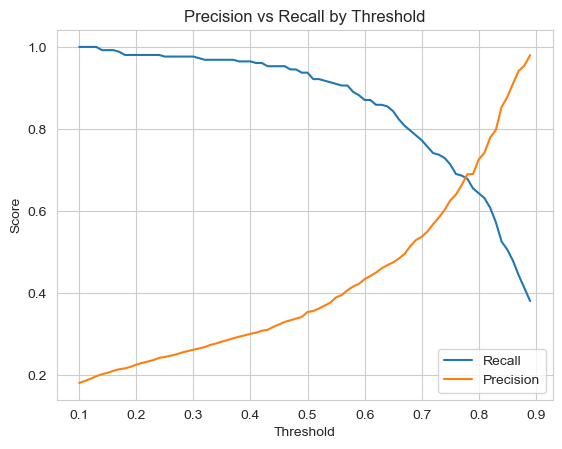

In [66]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.01)
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype("int32")
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall by Threshold')
plt.legend()


It looks like the threshold at 0.5 is ok.

## Model Results

<table>
    <tr>
        <th></th>
        <th>Recall (class 1)</th>
        <th>F1-Score (class 1)</th>
        <th>ROC-AUC</tr>
    </tr>
    <tr style="background-color: #d4edda;"">
        <td><b>Keras Sequential Model</b></td>
        <td>0.94</td>
        <td>0.51</td>
        <td>0.96</td>
    </tr>
</table>

The results of the Deep Learning models for the various parameters can be found in this <a href="Results.xlsx">LINK</a>.

# Conclusion

Below is a table comparing the best-performing results of the machine learning and deep learning models. Given the medical context, the recall for class 1 (diabetes-positive patients) is considered the primary metric, while the F1-score and ROC-AUC serve as secondary metrics.

<table>
    <tr>
        <th></th>
        <th>Recall (class 1)</th>
        <th>F1-Score (class 1)</th>
        <th>ROC-AUC</tr>
    </tr>
    <tr style="background-color: #d4edda;">
        <td><b>Random Forest (machine learning)</b></td>
        <td>0.91</td>
        <td>0.61</td>
        <td>0.976</td>
    </tr>
    <tr>
        <td><b>Sequential (deep learning)</b></td>
        <td>0.94</td>
        <td>0.51</td>
        <td>0.96</td>
    </tr>
</table>

Although the Sequential (deep learning) model achieves slightly higher recall for diabetes-positive patients, the Random Forest (machine learning) model is chosen due to its lighter computational requirements, better overall balance in F1-score and ROC-AUC, and greater interpretability. The small decrease in recall is considered acceptable in practical deployment, especially since uncertain cases can be flagged for further review.

# Save model

We will save the optimal model for future applications.

In [67]:
import joblib

joblib.dump(model_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']